**Q - when should we use MSE, and when should we use Cross-Entropy as a means to evaluate our model?**

cross entropy is a measure of difference between two discrete probability distributions. In particular the categorical cross entropy is used as the loss function where the target variable is binary (0, 1) with some probability (0..1). This measure is mainly used in **classification tasks**


The mean squared error is a measure of distance (expressed as the variance) between two sets of real (continuous) values (-inf .. +inf), and is mostly useful for linear regression, where we have a dataset which outputs a continous value, and we are looking to predict continous values

**Q - when do we use the Softmax activation function?**

The softmax activation function is usually used as the activation function of the final layer of neural networks to be able to give a human interpretable probability among the final layer's neurons, where all the nuerons sum up to become the value 1, usually the highest value neuron is "fired", outputing the value 1, whereas the other nuerons output the value 0. By this we can understand that Softmax is usually used for cases where we want to only select one class among many classes (>2). in classification tasks where we pick only have two classes, or for multi-label classification tasks, the sigmoid activation function is used instead of softmax. 

**Q - What's the difference between incremental learning and batch learning?**

Incremental learning, also known as Online learning, is a machine learning method in which the system learns “incrementally” with an updating algorithm, and the system’s knowledge is updated every time, Meaning this method is constantly updating its weights, its error calculation (and thus gradient estimation) uses different weights for each input sample.

In the Bach based method, it takes less time to process the data that comes in bulk, and it’s updated once the data chunk is processed. In this method, the learning happens only when the batch processing is completed. This means that this method keeps the system weights constant while computing the error associated with each sample in the input. Note that the batch can either be the entire data we have at hand, or the data can be split throughout equal sized batches. One entire iteration of the data is known as an epoch

Most of the ML learning algorithms follow the Batch method. 

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import LeakyReLU
from keras.layers import Activation, Dense,Dropout
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
!pip install utilspie

from utilspie import iterutils

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
main_df = pd.read_excel('/content/drive/MyDrive/datasets/Temperature.xlsx')

lets normalize the dataset with a min-max scaler

In [ ]:
 scaler = MinMaxScaler()
 main_df[['دما']] = scaler.fit_transform(main_df[['دما']]) #first normalize the entire dataset

#Exercise part 1 - Building the datasets

In [ ]:
'''
This function takes in a window_size, and splits the main dataframes tempature 
column into the input and output columns the question expects.


'''
def create_df(window_size):
  df = pd.DataFrame(columns=('temp_in', 'temp_out'))
  #enumerating on equal size chunks of window_size+1
  for i, lst in enumerate(list(iterutils.get_chunks(list(main_df['دما']), window_size+1))): 
    try:
      df = df.append({'temp_in':np.array(lst[0:window_size]), 'temp_out':lst[window_size]}, ignore_index=True)
    except IndexError:
      break
  return df

In [ ]:
df1=create_df(3)
df2=create_df(5)
df3= create_df(10)

In [ ]:
# df1['temp_in'] = MinMaxScaler().fit_transform(np.array(df1['temp_in']).tolist()).tolist()
# df2['temp_in'] = MinMaxScaler().fit_transform(np.array(df2['temp_in']).tolist()).tolist()
# df3['temp_in'] = MinMaxScaler().fit_transform(np.array(df3['temp_in']).tolist()).tolist()

In [ ]:
df1

,temp_in,temp_out
0,"[0.4070796460176991, 0.3893805309734513, 0.453...",0.573451
1,"[0.584070796460177, 0.4672566371681416, 0.4424...",0.417699
2,"[0.44601769911504424, 0.46017699115044247, 0.5...",0.467257
3,"[0.4424778761061947, 0.4247787610619469, 0.417...",0.407080
4,"[0.39292035398230085, 0.31504424778761064, 0.3...",0.414159
...,...,...
7268,"[0.5274336283185841, 0.5575221238938053, 0.4]",0.323894
7269,"[0.2778761061946903, 0.25486725663716814, 0.21...",0.470796
7270,"[0.5433628318584071, 0.5469026548672566, 0.384...",0.292035
7271,"[0.27079646017699116, 0.22654867256637168, 0.2...",0.453097


#Exercise part 2 - creating and testing NN's

we'll be tuning our NN by basing one of the datasets, and then create seperate models (with the tuned parameters) for each of the datasets

In [ ]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(df1['temp_in'].apply(pd.Series), df1['temp_out'], test_size=0.25)
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(df2['temp_in'].apply(pd.Series), df2['temp_out'], test_size=0.25)
xtrain3, xtest3, ytrain3, ytest3 = train_test_split(df3['temp_in'].apply(pd.Series), df3['temp_out'], test_size=0.25)

In [ ]:
print(xtrain1)

             0         1         2
3057  0.500885  0.417699  0.334513
3484  0.566372  0.601770  0.796460
724   0.265487  0.223009  0.343363
1101  0.934513  0.881416  0.771681
6711  0.391150  0.488496  0.569912
...        ...       ...       ...
4364  0.362832  0.460177  0.456637
5629  0.575221  0.548673  0.550442
2524  0.623009  0.660177  0.732743
99    0.513274  0.400000  0.361062
6393  0.486726  0.743363  0.794690

[5454 rows x 3 columns]


In [ ]:
NUM_HIDDEN_LAYERS = 1
LAYER_SIZE = 145
LEARNING_RATE = 0.01
ACTIVATION_FUNC = 'relu'

In [ ]:
def get_model(n_inputs, n_outputs):
  model = Sequential()
  model.add(Dense(LAYER_SIZE, input_dim=n_inputs, kernel_initializer='normal', activation=ACTIVATION_FUNC))
  for _ in range(NUM_HIDDEN_LAYERS-1): 
    model.add(Dense(LAYER_SIZE, kernel_initializer='normal', activation=ACTIVATION_FUNC))
  model.add(Dense(1, kernel_initializer='normal'))
  # Compile model
  opt = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
  model.compile(loss='mean_squared_error', optimizer=opt)
  return model
 

n_inputs, n_outputs = xtrain1.shape[1], 1


model = get_model(n_inputs, n_outputs)
history= model.fit(xtrain1, ytrain1, verbose=0, epochs=30,validation_split = 0.1)

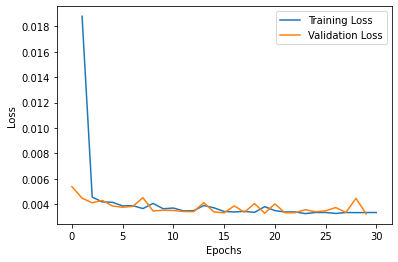

In [ ]:
loss_values = history.history['loss']
vlloss_values = history.history['val_loss']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, label='Training Loss')
plt.plot(vlloss_values, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
model1 = get_model(3, 1)
model1.fit(xtrain1, ytrain1, verbose=0, epochs=15)

model2 = get_model(5, 1)
model2.fit(xtrain2, ytrain2, verbose=0, epochs=15)

print("verbose for third model: ")
model3 = get_model(10, 1)
model3.fit(xtrain3, ytrain3, verbose=1, epochs=15)



verbose for third model: 
Epoch 1/15
62/62 [==============================] - 0s 2ms/step - loss: 0.0237
Epoch 2/15
62/62 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 3/15
62/62 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 4/15
62/62 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 5/15
62/62 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 6/15
62/62 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 7/15
62/62 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 8/15
62/62 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 9/15
62/62 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 10/15
62/62 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 11/15
62/62 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 12/15
62/62 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 13/15
62/62 [====

In [ ]:
ypred1 = model1.predict(xtest1)
ypred2 = model2.predict(xtest2)
ypred3 = model3.predict(xtest3)

In [ ]:
print ("***** R2 SCORE *****")
print(f"database 1 : {sklearn.metrics.r2_score(ytest1,ypred1)}")
print(f"database 2: {sklearn.metrics.r2_score(ytest2,ypred2)}")
print(f"database 3: {sklearn.metrics.r2_score(ytest3,ypred3)}")

print("\n\n")

print ("***** Mean Squeard Error *****")
print(f"database 1 : {sklearn.metrics.mean_squared_error(ytest1,ypred1)}")
print(f"database 2: {sklearn.metrics.mean_squared_error(ytest2,ypred2)}")
print(f"database 3: {sklearn.metrics.mean_squared_error(ytest3,ypred3)}")

***** R2 SCORE *****
database 1 : 0.8752122313834875
database 2: 0.9314291586817531
database 3: 0.9690746839112283



***** Mean Squeard Error *****
database 1 : 0.004579657547498688
database 2: 0.002500762516705793
database 3: 0.0012169487073048278


after tuning the hyperparameters based on one of the datasets, and creating a seperate model for each of the datasesets with these tuned parameters, we seem to be getting good results for each of the databases. 

for tuning the hyperparameters I tried many different variations, until I reached a variation which gave me the best results among them all.

For example, I tried creating a deep network, but I saw that not only wasn't I getting better results, but the results were slightly worse.
Or that having a small number of neurons for the hidden layers wasn't giving good results, but by picking a moderate number, I got acceptable results. As for the activation function, the Relu function seemed to be giving the best result 